# The sparks foundation (Data science and Business analytics internship)

# GRIP(sep 2022 )-Task 4 :- Exploratory Data Analysis - Terrorism¶
Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

● Dataset: https://bit.ly/2TK5Xn5

# Auther : yasmeen sharaan

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing libraries

In [2]:
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terrorism.shape

(181691, 135)

In [4]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terrorism.isna().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [7]:
terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
# I'm just take important data in whole dataset those I'm using further processing.
terrorism=terrorism[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
terrorism.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [12]:
terrorism.count()

Year           181691
Month          181691
Day            181691
Country        181691
state          181270
Region         181691
city           181257
latitude       177135
longitude      177134
AttackType     181691
Killed         171378
Wounded        165380
Target         181055
Summary        115562
Group          181691
Target_type    181691
Weapon_type    181691
Motive          50561
dtype: int64

In [23]:
terrorism.duplicated().sum()

9498

In [24]:
terrorism.drop_duplicates(inplace = True)
terrorism.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [25]:
terrorism.shape

(172193, 18)

In [26]:
terrorism.duplicated().sum()

0

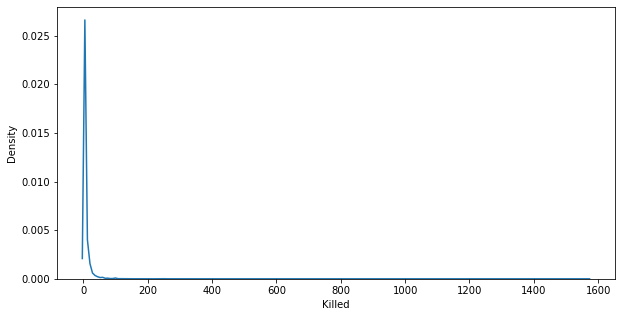

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(a=terrorism["Killed"],bins=20,hist=False)
plt.show()

array([[<AxesSubplot:title={'center':'Killed'}>]], dtype=object)

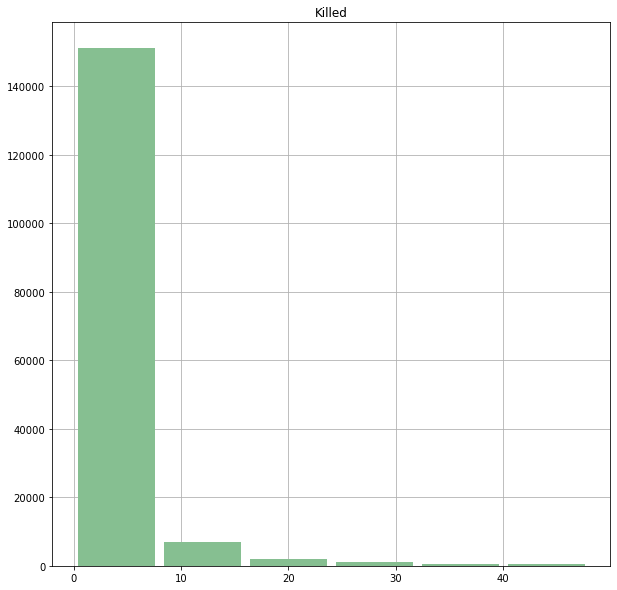

In [59]:
#plt.figure(figsize=(10,5))
#sns.distplot(a=terrorism["Killed"],bins=20,kde=False)
#plt.show()
terrorism.hist(column='Killed', bins=range(0,50,8), figsize=(10,10), color='#86bf91', zorder=2, rwidth=0.9)


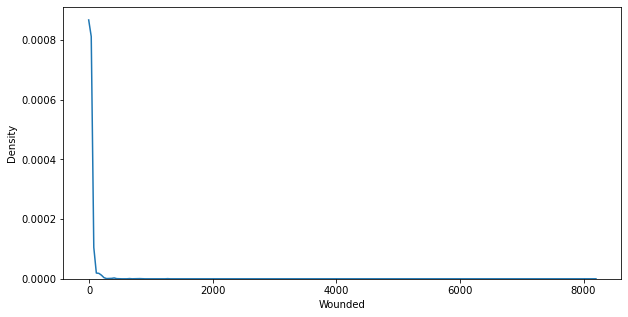

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(a=terrorism["Wounded"],bins=20,hist=False)
plt.show()

array([[<AxesSubplot:title={'center':'Wounded'}>]], dtype=object)

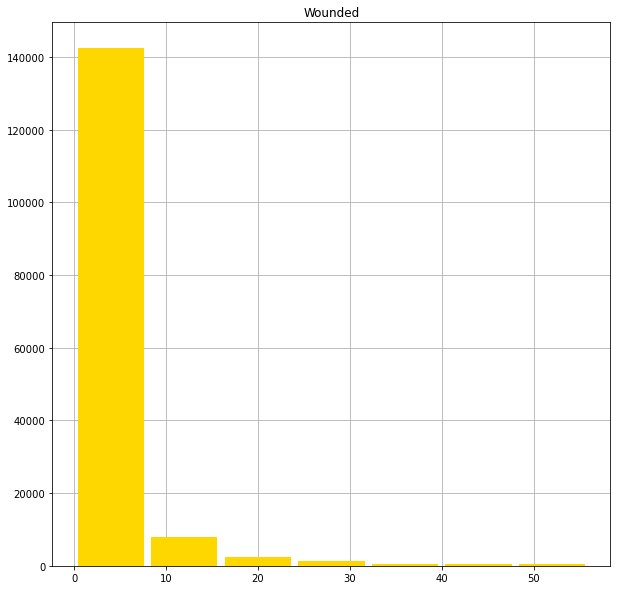

In [60]:
terrorism.hist(column='Wounded', bins=range(0,60,8), figsize=(10,10), color='#FFD700', zorder=2, rwidth=0.9)


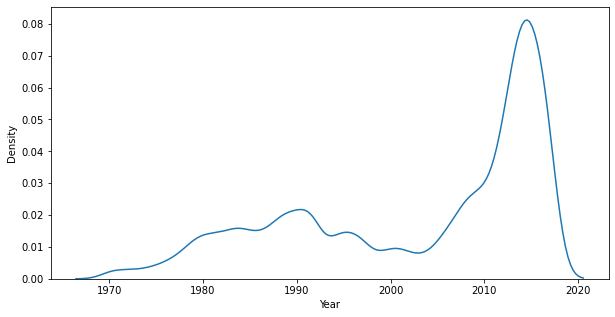

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(a=terrorism["Year"],bins=20,hist=False)
plt.show()


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

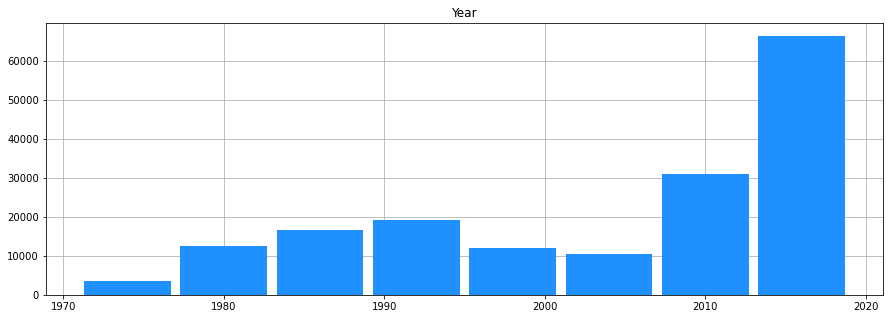

In [56]:
#plt.figure(figsize=(15,5))
#sns.distplot(a=terrorism["Year"],bins=20,kde=False)
#plt.show()
terrorism.hist(column='Year', bins=range(1971,2020,6), figsize=(15,5), color='#1E90FF', zorder=2, rwidth=0.9)


In [52]:
terrorism['Year'].value_counts()

2014    16429
2015    14516
2016    12918
2013    11846
2017    10606
2012     8385
2011     5040
2010     4811
2008     4788
2009     4718
1992     4647
1991     4065
1989     3943
1988     3417
1990     3384
2007     3212
1994     3181
1984     3087
2006     2753
1997     2731
1983     2720
1987     2603
1996     2535
1995     2522
1980     2486
1981     2483
1985     2435
1986     2434
1982     2416
1979     2379
2005     2016
2001     1895
2000     1796
1978     1458
1999     1385
2002     1316
2003     1259
1977     1212
2004     1162
1998      906
1976      893
1975      725
1970      643
1974      576
1972      531
1973      470
1971      460
Name: Year, dtype: int64

In [13]:
terrorism.nunique()

Year               47
Month              13
Day                32
Country           205
state            2855
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [94]:
terrorism['Country'].value_counts()

Iraq                   23459
Pakistan               13795
Afghanistan            12512
India                  11585
Colombia                7504
                       ...  
International              1
Vatican City               1
Wallis and Futuna          1
Falkland Islands           1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [113]:
df = terrorism['Country'].value_counts()
df2 = pd.DataFrame(df2)
df2

,Country
Iraq,23459
Pakistan,13795
Afghanistan,12512
India,11585
Colombia,7504
Philippines,6771
Peru,5048
United Kingdom,4998
El Salvador,4305
Somalia,4121


In [14]:
terrorism['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

In [15]:
terrorism['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [22]:
round(terrorism[['Killed','Wounded']].describe(),4)

,Killed,Wounded
count,171378.0000,165380.0000
mean,2.4033,3.1677
std,11.5457,35.9494
min,0.0000,0.0000
25%,0.0000,0.0000
50%,0.0000,0.0000
75%,2.0000,2.0000
max,1570.0000,8191.0000


In [17]:
print("Country with the most attacks:",terrorism['Country'].value_counts().idxmax())
print("City with the most attacks:",terrorism['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terrorism['Region'].value_counts().idxmax())
print("Year with the most attacks:",terrorism['Year'].value_counts().idxmax())
print("Month with the most attacks:",terrorism['Month'].value_counts().idxmax())
print("Group with the most attacks:",terrorism['Group'].value_counts().index[1])
print("Most Attack Types:",terrorism['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Outliers

<AxesSubplot:>

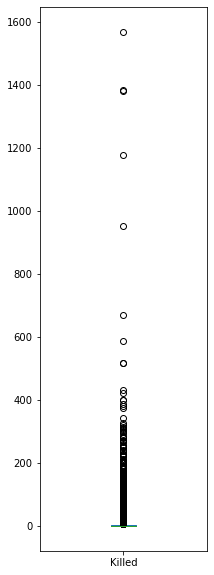

In [71]:
#plt.figure(figsize=(20,5))
#sns.boxplot(x=terrorism.Killed, data=terrorism)
#plt.show()
terrorism['Killed'].plot(kind='box', figsize=(3,10))


In [66]:
data=np.array(terrorism['Killed'])
# calculate quartiles
quartiles = np.nanpercentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data[0].min(), data[0].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 1.000
Q1: 0.000
Median: 1.000
Q3: 2.000
Max: 1.000


<AxesSubplot:>

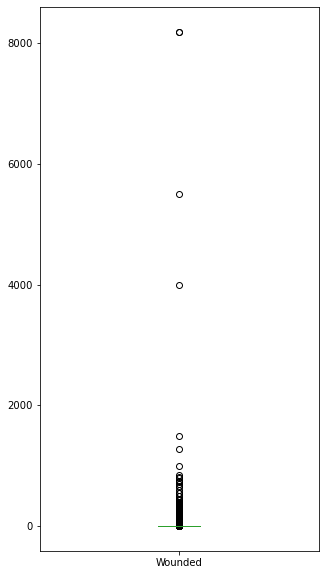

In [75]:
""""
plt.figure(figsize=(20,5))
sns.boxplot(x=terrorism.Wounded, data=terrorism)
plt.show()
""""
terrorism['Wounded'].plot(kind='box', figsize=(5,10))


In [67]:
data=np.array(terrorism['Wounded'])
# calculate quartiles
quartiles = np.nanpercentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data[0].min(), data[0].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 0.000
Median: 0.000
Q3: 2.000
Max: 0.000


<AxesSubplot:>

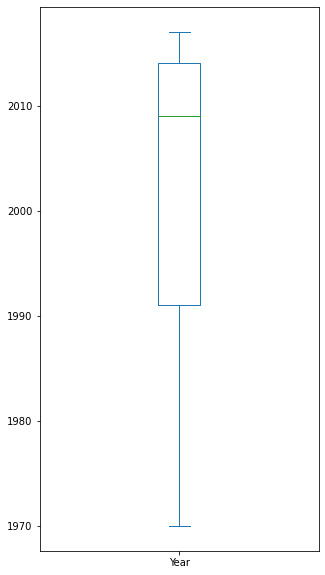

In [76]:
""""
plt.figure(figsize=(20,5))
sns.boxplot(x=terrorism.Year, data=terrorism)
plt.show()
"""
terrorism['Year'].plot(kind='box', figsize=(5,10))


In [68]:
data=np.array(terrorism['Year'])
# calculate quartiles
quartiles = np.nanpercentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data[0].min(), data[0].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 1970.000
Q1: 1991.000
Median: 2009.000
Q3: 2014.000
Max: 1970.000


In [65]:
terrorism.corr()


,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,-0.002352,0.018005,0.152200,0.004103,0.010016,0.013010
Month,-0.002352,1.000000,0.005483,-0.014206,-0.003977,0.003318,0.002984
Day,0.018005,0.005483,1.000000,0.002972,-0.002341,-0.004229,-0.001412
latitude,0.152200,-0.014206,0.002972,1.000000,0.001549,-0.020988,0.015479
longitude,0.004103,-0.003977,-0.002341,0.001549,1.000000,-0.000543,0.000233
Killed,0.010016,0.003318,-0.004229,-0.020988,-0.000543,1.000000,0.534828
Wounded,0.013010,0.002984,-0.001412,0.015479,0.000233,0.534828,1.000000


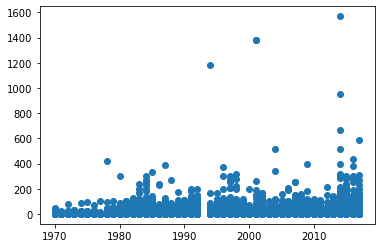

In [81]:
plt.scatter(x=terrorism['Year'], y=terrorism['Killed'])

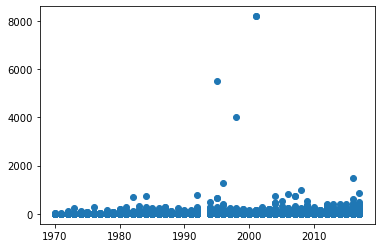

In [84]:
plt.scatter(x=terrorism['Year'], y=terrorism['Wounded'])

In [148]:
#sns.barplot(x=terrorism['Country'].value_counts()[:20].index,y=terrorism['Country'].value_counts()[:20].values)
terrorism1 = terrorism[['Country','Killed','Wounded']]
sns.set(style='white')

x = terrorism1['Country'].value_counts()[:20]
x


df.plot(kind='bar', stacked=True, color=['skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
 
# title of plot
plt.title('Monthly Temperatures in a year')


Iraq              23459
Pakistan          13795
Afghanistan       12512
India             11585
Colombia           7504
Philippines        6771
Peru               5048
United Kingdom     4998
El Salvador        4305
Somalia            4121
Turkey             4086
Nigeria            3828
Thailand           3740
Yemen              3305
Spain              3072
Sri Lanka          2915
United States      2793
Algeria            2721
Lebanon            2437
Egypt              2406
Name: Country, dtype: int64

In [ ]:
""""
order = ['Killed', 'Wounded']
terrorism.groupby('Country')[order].sum().plot.bar(stacked=True,figsize=(15,10))
plt.title('total number of killed and wounded each Counrt')

deaths=data[['Country','Kill','Wounded']].groupby(['Year']).sum()

fig, ax2=plt.subplots(figsize=(20,10))
deaths.plot(kind="bar", ax=ax2)
plt.title('total number of killed and wounded each Counrt')

df = pd.DataFrame(terrorism.groupby(terrorism1['Country'].value_counts()[:20]))
df.head()

Text(0.5, 0, 'Country Name')

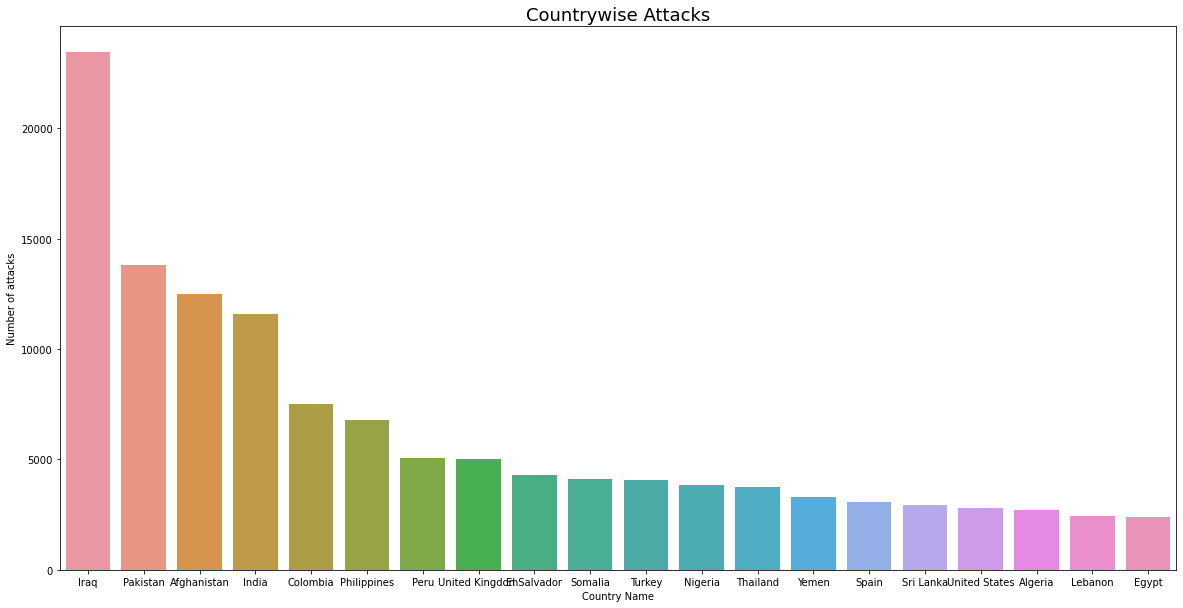

In [138]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x=terrorism['Country'].value_counts()[:20].index,y=terrorism['Country'].value_counts()[:20].values)
plt.title('Countrywise Attacks',fontsize=18)
plt.ylabel('Number of attacks')
plt.xlabel('Country Name')

In [170]:
!pip install wordcloud

In [171]:
from wordcloud import WordCloud
from scipy import signal

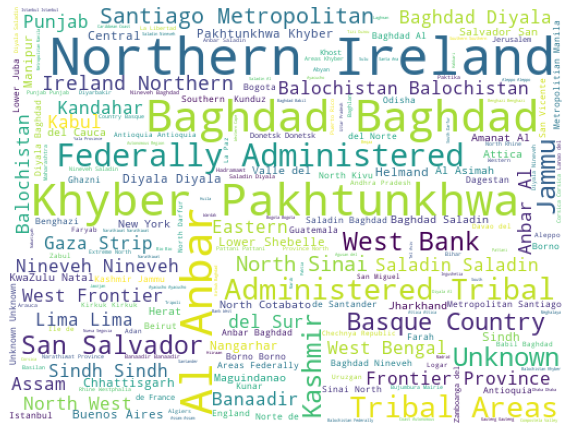

In [172]:


cities = terrorism.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

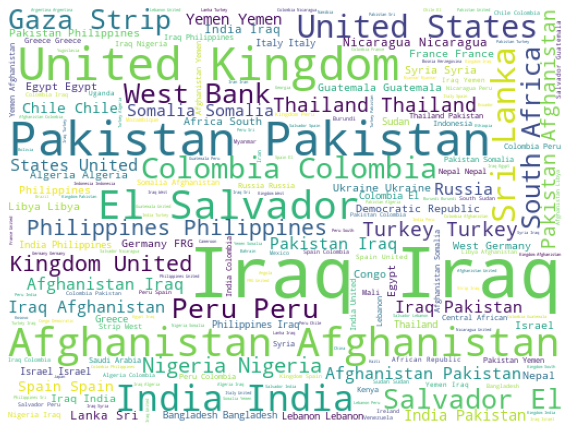

In [173]:
counties = terrorism.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(counties))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [174]:
terrorism.to_csv('terrorismfinally.csv')